# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


In [14]:
url = f"https://api.openweathermap.org/data/2.5/weather?q=Minneapolis&appid={weather_api_key}"

cw = requests.get(url).json()




city_lat = cw['coord']['lat']
city_lng = cw['coord']['lon']
city_max_temp = cw['main']['temp_max']
city_humidity = cw['main']['humidity']
city_clouds = cw['clouds']['all']
city_wind = cw['wind']['speed']
city_country = cw['sys']['country']
city_date = cw['dt']


{'coord': {'lon': -93.2638, 'lat': 44.98},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 278.34,
  'feels_like': 275.48,
  'temp_min': 276.56,
  'temp_max': 279.41,
  'pressure': 1023,
  'humidity': 62,
  'sea_level': 1023,
  'grnd_level': 990},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 10},
 'clouds': {'all': 20},
 'dt': 1731368853,
 'sys': {'type': 2,
  'id': 2012563,
  'country': 'US',
  'sunrise': 1731330360,
  'sunset': 1731365306},
 'timezone': -21600,
 'id': 5037649,
 'name': 'Minneapolis',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# {city name}&appid={API key}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + f"&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        cw = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = cw['coord']['lat']
        city_lng = cw['coord']['lon']
        city_max_temp = cw['main']['temp_max']
        city_humidity = cw['main']['humidity']
        city_clouds = cw['clouds']['all']
        city_wind = cw['wind']['speed']
        city_country = cw['sys']['country']
        city_date = cw['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ulsteinvik
Processing Record 2 of Set 1 | bayanhongor
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | kayenta
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | anibare
City not found. Skipping...
Processing Record 7 of Set 1 | windsor
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | newman
Processing Record 10 of Set 1 | iskushuban
Processing Record 11 of Set 1 | vorgashor
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | medicine hat
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | bahia de caraquez
Processing Record 16 of Set 1 | nova sintra
Processing Record 17 of Set 1 | walvis bay
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | veraval
Processing Record 20 of Set 1 | yamada
Processing Record 21 of Set 1 | 'ohonua
City not found. Skipping...
Pr

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ulsteinvik,62.3432,5.8487,279.99,93,100,3.21,NO,1731370127
1,bayanhongor,46.7167,100.1167,257.54,84,28,1.76,MN,1731370128
2,iqaluit,63.7506,-68.5145,262.98,85,97,0.89,CA,1731370130
3,kayenta,36.7278,-110.2546,284.89,30,5,1.53,US,1731370131
4,margaret river,-33.9500,115.0667,289.28,67,99,4.72,AU,1731370132


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [40]:
# Read saved data
cd = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
cd['Max Temp'] = cd['Max Temp'] - 273.15
cd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ulsteinvik,62.3432,5.8487,6.84,93,100,3.21,NO,1731370127
1,bayanhongor,46.7167,100.1167,-15.61,84,28,1.76,MN,1731370128
2,iqaluit,63.7506,-68.5145,-10.17,85,97,0.89,CA,1731370130
3,kayenta,36.7278,-110.2546,11.74,30,5,1.53,US,1731370131
4,margaret river,-33.9500,115.0667,16.13,67,99,4.72,AU,1731370132


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

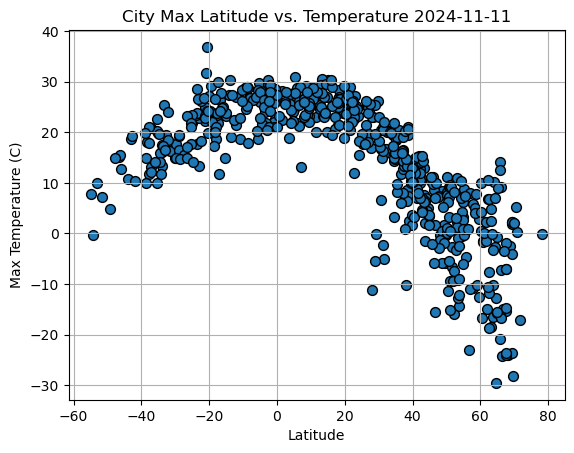

<Figure size 640x480 with 0 Axes>

In [49]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
lat_temp = cd.plot.scatter(
    'Lat',
    'Max Temp',
    grid = True,
    xlabel = 'Latitude',
    ylabel = 'Max Temperature (C)',
    title = 'City Max Latitude vs. Temperature 2024-11-11',
    edgecolor='black',
    s = 50)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.show()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot


#### Latitude Vs. Humidity

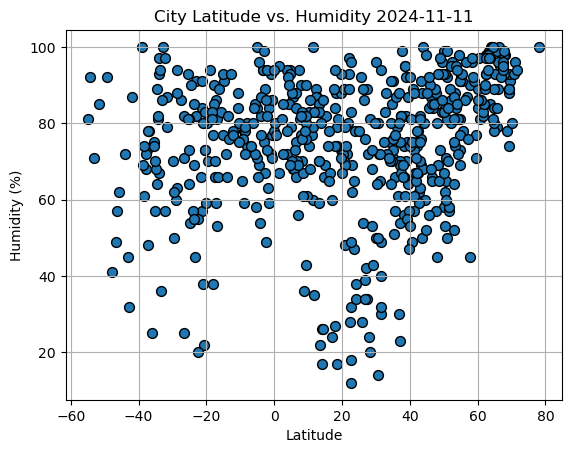

In [53]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
lat_humid = cd.plot.scatter(
    'Lat',
    'Humidity',
    grid = True,
    xlabel = 'Latitude',
    ylabel = 'Humidity (%)',
    title = 'City Latitude vs. Humidity 2024-11-11',
    edgecolor='black',
    s = 50)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.savefig("output_data/Fig2.png")
# Save the figure


# Show plot
plt.show()

#### Latitude Vs. Cloudiness

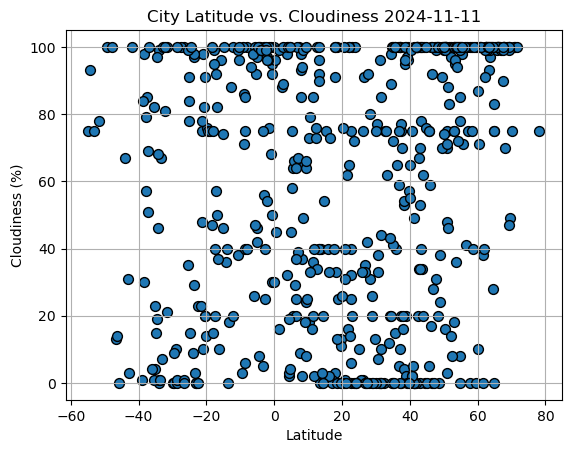

In [62]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
lat_cloud = cd.plot.scatter(
    'Lat',
    'Cloudiness',
    grid = True,
    xlabel = 'Latitude',
    ylabel = 'Cloudiness (%)',
    title = 'City Latitude vs. Cloudiness 2024-11-11',
    edgecolor='black',
    s = 50)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

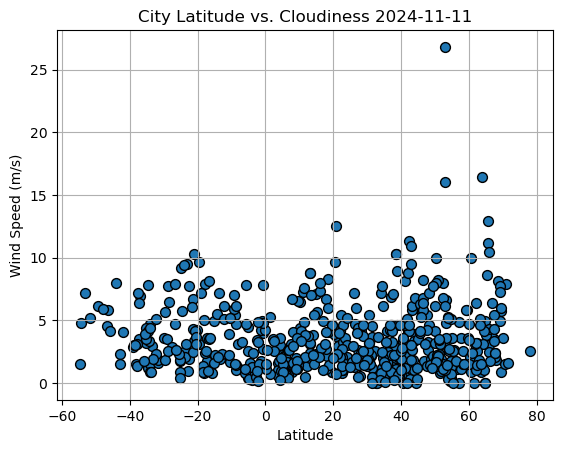

In [61]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
lat_wind = cd.plot.scatter(
    'Lat',
    'Wind Speed',
    grid = True,
    xlabel = 'Latitude',
    ylabel = 'Wind Speed (m/s)',
    title = 'City Latitude vs. Cloudiness 2024-11-11',
    edgecolor='black',
    s = 50)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [59]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = cd[cd['Lat'] >= 0].copy()
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ulsteinvik,62.3432,5.8487,6.84,93,100,3.21,NO,1731370127
1,bayanhongor,46.7167,100.1167,-15.61,84,28,1.76,MN,1731370128
2,iqaluit,63.7506,-68.5145,-10.17,85,97,0.89,CA,1731370130
3,kayenta,36.7278,-110.2546,11.74,30,5,1.53,US,1731370131
5,windsor,42.3001,-83.0165,10.01,67,20,11.32,CA,1731369840


In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = cd[cd['Lat'] < 0].copy()
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,margaret river,-33.9500,115.0667,16.13,67,99,4.72,AU,1731370132
10,grytviken,-54.2811,-36.5092,-0.35,92,93,4.76,GS,1731370141
12,port-aux-francais,-49.3500,70.2167,4.87,92,100,6.11,TF,1731370143
13,bahia de caraquez,-0.6000,-80.4167,22.58,77,30,3.98,EC,1731370144
15,walvis bay,-22.9575,14.5053,13.28,91,0,0.97,NaN,1731370146


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7075409331656376


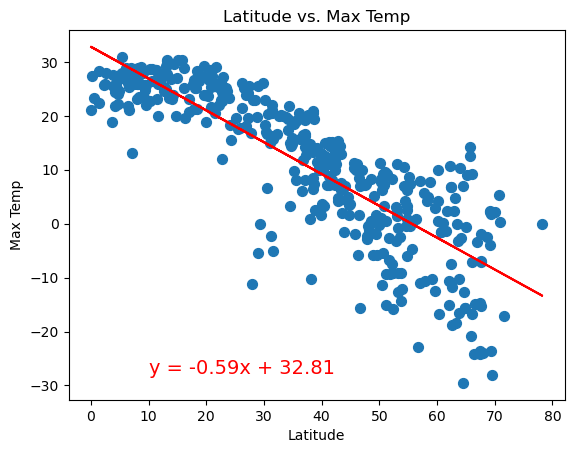

In [94]:
# Linear regression on Northern Hemisphere
northern_hemi_lat_temp = northern_hemi_df.plot.scatter(
    'Lat',
    'Max Temp',
    xlabel = 'Latitude',
    ylabel = 'Max Temp',
    title = 'Latitude vs. Max Temp',
    s = 50)

slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])

regress_values1 = northern_hemi_df['Lat'] * slope + intercept
print(f"The r^2-value is: {rvalue**2}")
plt.plot(northern_hemi_df['Lat'],regress_values1,"r-")
plt.text(10, -25, f"y = {round(slope,2)}x + {round(intercept,2)}", color='red',
         verticalalignment='top', fontsize=14)
plt.show()

The r^2-value is: 0.534500674638121


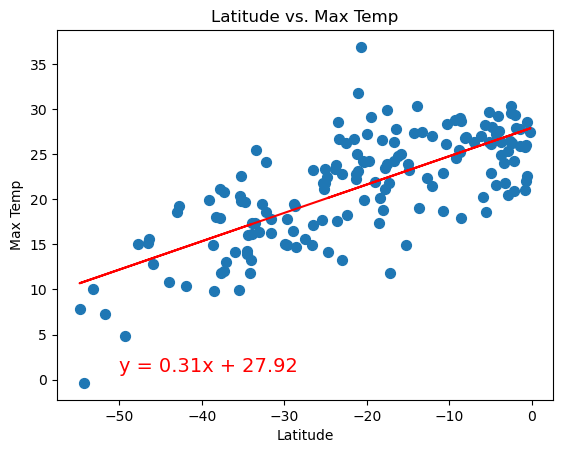

In [104]:
# Linear regression on Southern Hemisphere
southern_hemi_lat_temp = southern_hemi_df.plot.scatter(
    'Lat',
    'Max Temp',
    xlabel = 'Latitude',
    ylabel = 'Max Temp',
    title = 'Latitude vs. Max Temp',
    s = 50)

slope2, intercept2, rvalue2, pvalue2, stderr2 = linregress(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

regress_values2 = southern_hemi_df['Lat'] * slope2 + intercept2

print(f"The r^2-value is: {rvalue2**2}")

plt.plot(southern_hemi_df['Lat'],regress_values2,"r-")

plt.text(-50, 2.5, f"y = {round(slope2,2)}x + {round(intercept2,2)}", color='red',
         verticalalignment='top', fontsize=14)
plt.show()

**Discussion about the linear relationship:**
The northern hemisphere shows a negative correlation, and the southern hemisphere shows a positive correlation. This makes sense because temperatures are increasing as they get closer to the equator, and they are decreasing as they get closer to the poles. 



### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0982814979646253


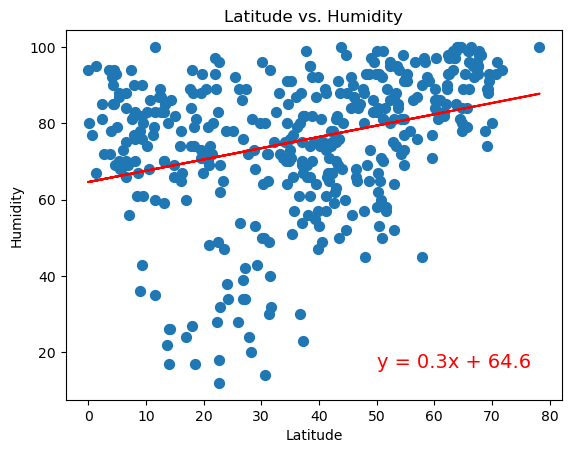

In [108]:
northern_hemi_lat_humi = northern_hemi_df.plot.scatter(
    'Lat',
    'Humidity',
    xlabel = 'Latitude',
    ylabel = 'Humidity',
    title = 'Latitude vs. Humidity',
    s = 50)

slope3, intercept3, rvalue3, pvalue3, stderr3 = linregress(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

regress_values3 = northern_hemi_df['Lat'] * slope3 + intercept3
print(f"The r^2-value is: {rvalue3**2}")
plt.plot(northern_hemi_df['Lat'],regress_values3,"r-")

plt.text(50, 20, f"y = {round(slope3,2)}x + {round(intercept3,2)}", color='red',
         verticalalignment='top', fontsize=14)
plt.show()

The r^2-value is: 0.032684280104262366


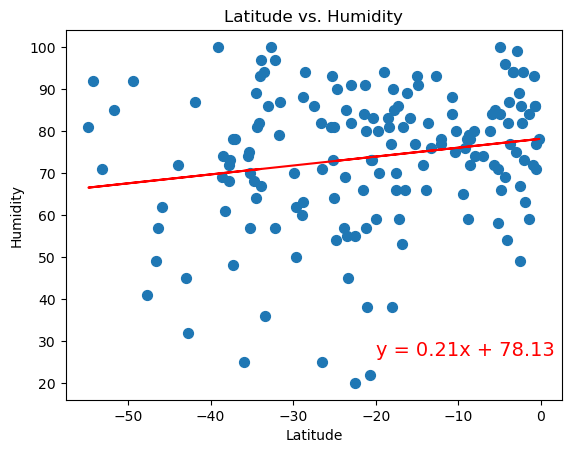

In [107]:
southern_hemi_lat_humi = southern_hemi_df.plot.scatter(
    'Lat',
    'Humidity',
    xlabel = 'Latitude',
    ylabel = 'Humidity',
    title = 'Latitude vs. Humidity',
    s = 50)

slope4, intercept4, rvalue4, pvalue4, stderr4 = linregress(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

regress_values4 = southern_hemi_df['Lat'] * slope4 + intercept4

print(f"The r^2-value is: {rvalue4**2}")

plt.plot(southern_hemi_df['Lat'],regress_values4,"r-")

plt.text(-20, 30, f"y = {round(slope4,2)}x + {round(intercept4,2)}", color='red',
         verticalalignment='top', fontsize=14)
plt.show()

**Discussion about the linear relationship:** 
There is less correlation here. Humidity is influenced by the city altitudes and proximity to water more than their proximity to the poles/equator.



### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.1123465891516918


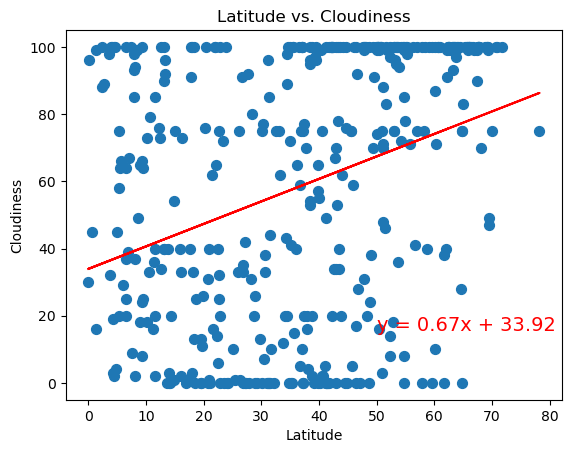

In [110]:
northern_hemi_lat_cloud = northern_hemi_df.plot.scatter(
    'Lat',
    'Cloudiness',
    xlabel = 'Latitude',
    ylabel = 'Cloudiness',
    title = 'Latitude vs. Cloudiness',
    s = 50)

slope5, intercept5, rvalue5, pvalue5, stderr5 = linregress(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

regress_values5 = northern_hemi_df['Lat'] * slope5 + intercept5
print(f"The r^2-value is: {rvalue5**2}")
plt.plot(northern_hemi_df['Lat'],regress_values5,"r-")

plt.text(50, 20, f"y = {round(slope5,2)}x + {round(intercept5,2)}", color='red',
         verticalalignment='top', fontsize=14)
plt.show()

The r^2-value is: 0.04379221159331958


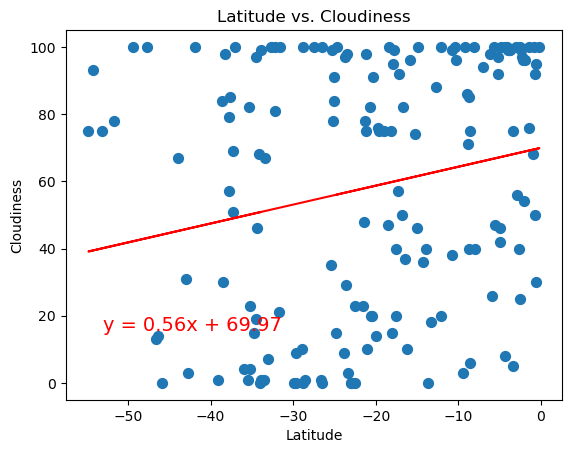

In [114]:
southern_hemi_lat_cloud = southern_hemi_df.plot.scatter(
    'Lat',
    'Cloudiness',
    xlabel = 'Latitude',
    ylabel = 'Cloudiness',
    title = 'Latitude vs. Cloudiness',
    s = 50)

slope6, intercept6, rvalue6, pvalue6, stderr6 = linregress(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

regress_values6 = southern_hemi_df['Lat'] * slope6 + intercept6

print(f"The r^2-value is: {rvalue6**2}")

plt.plot(southern_hemi_df['Lat'],regress_values6,"r-")

plt.text(-53, 20, f"y = {round(slope6,2)}x + {round(intercept6,2)}", color='red',
         verticalalignment='top', fontsize=14)
plt.show()

**Discussion about the linear relationship:** Both charts are showing slightly positive correlations, which is probably because it is getting close to winter right now in the Northern Hemisphere, where cloud cover is more prevalent. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.01927913241095331


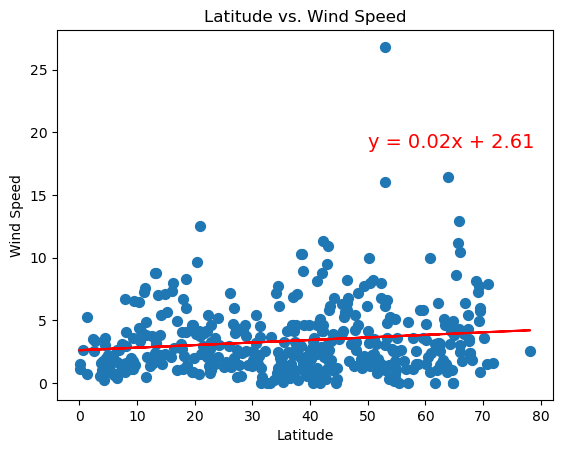

In [115]:
northern_hemi_lat_wind = northern_hemi_df.plot.scatter(
    'Lat',
    'Wind Speed',
    xlabel = 'Latitude',
    ylabel = 'Wind Speed',
    title = 'Latitude vs. Wind Speed',
    s = 50)

slope7, intercept7, rvalue7, pvalue7, stderr7 = linregress(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

regress_values7 = northern_hemi_df['Lat'] * slope7 + intercept7
print(f"The r^2-value is: {rvalue7**2}")
plt.plot(northern_hemi_df['Lat'],regress_values7,"r-")

plt.text(50, 20, f"y = {round(slope7,2)}x + {round(intercept7,2)}", color='red',
         verticalalignment='top', fontsize=14)
plt.show()

The r^2-value is: 0.04275760877788293


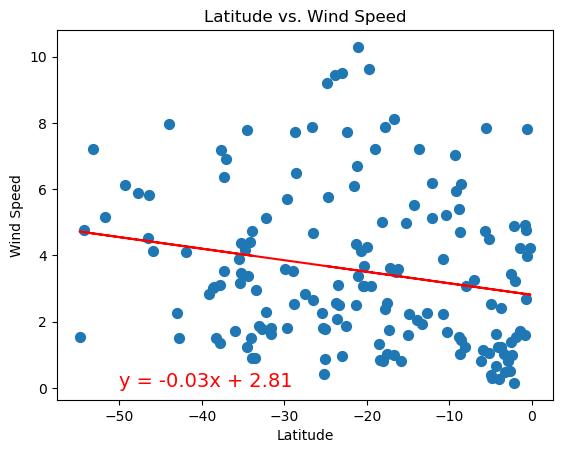

In [123]:
southern_hemi_lat_wind = southern_hemi_df.plot.scatter(
    'Lat',
    'Wind Speed',
    xlabel = 'Latitude',
    ylabel = 'Wind Speed',
    title = 'Latitude vs. Wind Speed',
    s = 50)

slope8, intercept8, rvalue8, pvalue8, stderr8 = linregress(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])

regress_values8 = southern_hemi_df['Lat'] * slope8 + intercept8
print(f"The r^2-value is: {rvalue8**2}")
plt.plot(southern_hemi_df['Lat'],regress_values8,"r-")

plt.text(-50, .5, f"y = {round(slope8,2)}x + {round(intercept8,2)}", color='red',
         verticalalignment='top', fontsize=14)
plt.show()

**Discussion about the linear relationship:** These charts indicate winds are slightly weaker closer to the equator because the regression slopes both trend downward towards 0 degrees latitude. 